In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import pandas as pd
import plotly.express as px
import plotly.io as pio
import IPython

In [2]:
# Data preparation for Exploration 1 

'''
dir = "/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/MAG2P_order_parameters-2025-5-5-19:38:49.pickle"
#dir = "/home/karner/Documents/github/MagneticParticles/rigid_magnetic/results/MAG2P_order_parameters-2025-5-5-19:38:49.pickle"


dg = pd.read_pickle(dir)
dg = dg.fillna(0)
df = dg.iloc[:,:-24]
#df = dg.iloc[:,:-50]

#df["deg_0"] = np.log1p(dg[0.0])
#df["deg_7"] = np.log1p(dg[0.12566370614359174])
#df["deg_60"] = np.log1p(dg[1.0053096491487339])
#df["deg_90"] = np.log1p(dg[1.5079644737231008])

df.describe()

''' 

'\ndir = "/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/MAG2P_order_parameters-2025-5-5-19:38:49.pickle"\n#dir = "/home/karner/Documents/github/MagneticParticles/rigid_magnetic/results/MAG2P_order_parameters-2025-5-5-19:38:49.pickle"\n\n\ndg = pd.read_pickle(dir)\ndg = dg.fillna(0)\ndf = dg.iloc[:,:-24]\n#df = dg.iloc[:,:-50]\n\n#df["deg_0"] = np.log1p(dg[0.0])\n#df["deg_7"] = np.log1p(dg[0.12566370614359174])\n#df["deg_60"] = np.log1p(dg[1.0053096491487339])\n#df["deg_90"] = np.log1p(dg[1.5079644737231008])\n\ndf.describe()\n\n'

In [3]:
# Data preparation for Exploration 2

#dir = "/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/MAG2P_order_parameters-2025-5-7-21:12:39.pickle"
dir = "/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/MAG2P_order_parameters-2025-5-8-18:3:18.pickle" 

dg = pd.read_pickle(dir)
df = dg.fillna(0)
df = df.drop(columns=["std_bonds_1_8", "std_bonds_1_5", "std_size", "std_radius_of_gyration","std_second_neighbours"])
#df = df.loc[:, (df != 0).any(axis=0)]
#df = dg.drop(columns=["mean_bonds_1_2", "std_bonds_1_2" , "mean_bonds_1_3", "std_bonds_1_3", "mean_bonds_1_4", "std_bonds_1_4"])
df = df.iloc[:,:-20]
#df = df.drop(df.columns[14:62],axis=1)
df = df.loc[:, (df != 0).any(axis=0)]

#df["deg_0"] = np.log1p(dg[0.0])
#df["deg_7"] = np.log1p(dg[0.12566370614359174])
#df["deg_60"] = np.log1p(dg[1.0053096491487339])
#df["deg_90"] = np.log1p(dg[1.5079644737231008])
#df["deg_180"] = np.log1p(dg[3.0159289474462017])
df.columns


/tmp/ipykernel_27819/752970905.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = dg.fillna(0)


Index([                'file_id',                  'lambda',
                         'shift',          'mean_bonds_1_8',
                'mean_bonds_1_5',  'mean_second_neighbours',
                     'mean_size',                 'largest',
       'mean_radius_of_gyration',       0.12566370614359174,
             0.25132741228718347,        0.3769911184307752,
              0.5026548245743669,        0.6283185307179586,
              0.7539822368615504,        0.8796459430051422,
              1.0053096491487339,        1.1309733552923256,
              1.2566370614359172,        1.3823007675795091,
              1.5079644737231008,        1.6336281798666925,
              1.7592918860102844,         1.884955592153876,
              2.0106192982974678,        2.1362830044410597,
               2.261946710584651,         2.387610416728243,
              2.5132741228718345,        2.6389378290154264,
              2.7646015351590183,        2.8902652413026098,
              3.01592894

In [4]:

def auto_set_plotly_renderer():
    try:
        shell = IPython.get_ipython().__class__.__name__
        if "ZMQInteractiveShell" in shell:
            # Likely Jupyter Notebook or JupyterLab
            pio.renderers.default = "notebook_connected"
        else:
            # Fallback for scripts or non-notebook shells
            pio.renderers.default = "browser"
    except Exception:
        pio.renderers.default = "browser"  # absolute fallback

auto_set_plotly_renderer()
    

In [5]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
import plotly.express as px
from sklearn.preprocessing import StandardScaler

# Prepare data
X = df.iloc[:, 3:].values
X = StandardScaler().fit_transform(X)
labels = "s_" + df["shift"].astype(str) + "_" + df["lambda"].astype(str)

# Compute t-SNE
tsne_embedding = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=20, n_jobs=7).fit_transform(X)

# Build a DataFrame for Plotly
plot_df = pd.DataFrame({
    "TSNE-1": tsne_embedding[:, 0],
    "TSNE-2": tsne_embedding[:, 1],
    "Label": labels,
    "Shift": df["shift"],
    "Lambda": df["lambda"]
})

# Plot with hover using Shift as coloring 
fig = px.scatter(
    plot_df,
    x="TSNE-1",
    y="TSNE-2",
    color="Shift",  # can be removed if too many categories
    hover_data=["Shift", "Lambda"],
    color_continuous_scale="Turbo",  # any sequential scale
    title="t-SNE Embedding with Hover Labels",
    width=900,
    height=700
)

fig.update_traces(marker=dict(size=4))
fig.update_layout(showlegend=False)
fig.show()
fig.write_html("tsne_shift.html", auto_open=True)


# Plot with hover using Lambda as coloring 
fig = px.scatter(
    plot_df,
    x="TSNE-1",
    y="TSNE-2",
    color="Lambda",  # can be removed if too many categories
    hover_data=["Shift", "Lambda"],
    color_continuous_scale="Turbo",  # any sequential scale
    title="t-SNE Embedding with Hover Labels",
    width=900,
    height=700
)

fig.update_traces(marker=dict(size=4))
fig.update_layout(showlegend=False)
fig.show()
fig.write_html("tsne_lambda.html", auto_open=True)


In [6]:
from sklearn.decomposition import PCA

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Explained variance
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.31693454 0.18757136]


In [7]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import IPython

# Prepare data for plotly
biplot_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
biplot_df["Label"] = labels
biplot_df["Shift"] = df["shift"].values
biplot_df["Lambda"] = df["lambda"].values

fig = px.scatter(
    biplot_df,
    x="PC1", y="PC2",
    color="Shift",  # or "Shift"
    hover_data=["Shift", "Label"],
    color_continuous_scale="Turbo",  # any sequential scale
    title="PCA Biplot (Interactive)",
    width=900,
    height=700
)
fig.update_traces(marker=dict(size=4))
fig.update_layout(showlegend=False)
fig.show()
fig.write_html("pca_2d_shift.html", auto_open=True)


fig = px.scatter(
    biplot_df,
    x="PC1", y="PC2",
    color="Lambda",  # or "Shift"
    hover_data=["Shift", "Label"],
    color_continuous_scale="Turbo",  # any sequential scale
    title="PCA Biplot (Interactive)",
    width=900,
    height=700
)
fig.update_traces(marker=dict(size=4))
fig.update_layout(showlegend=False)
fig.show()
fig.write_html("pca_2d_lambda.html", auto_open=True)

Index([         'mean_bonds_1_8',          'mean_bonds_1_5',
        'mean_second_neighbours',               'mean_size',
                       'largest', 'mean_radius_of_gyration',
             0.12566370614359174,       0.25132741228718347,
              0.3769911184307752,        0.5026548245743669,
              0.6283185307179586,        0.7539822368615504,
              0.8796459430051422,        1.0053096491487339,
              1.1309733552923256,        1.2566370614359172,
              1.3823007675795091,        1.5079644737231008,
              1.6336281798666925,        1.7592918860102844,
               1.884955592153876,        2.0106192982974678,
              2.1362830044410597,         2.261946710584651,
               2.387610416728243,        2.5132741228718345,
              2.6389378290154264,        2.7646015351590183,
              2.8902652413026098,        3.0159289474462017,
                               2,                         3,
                        

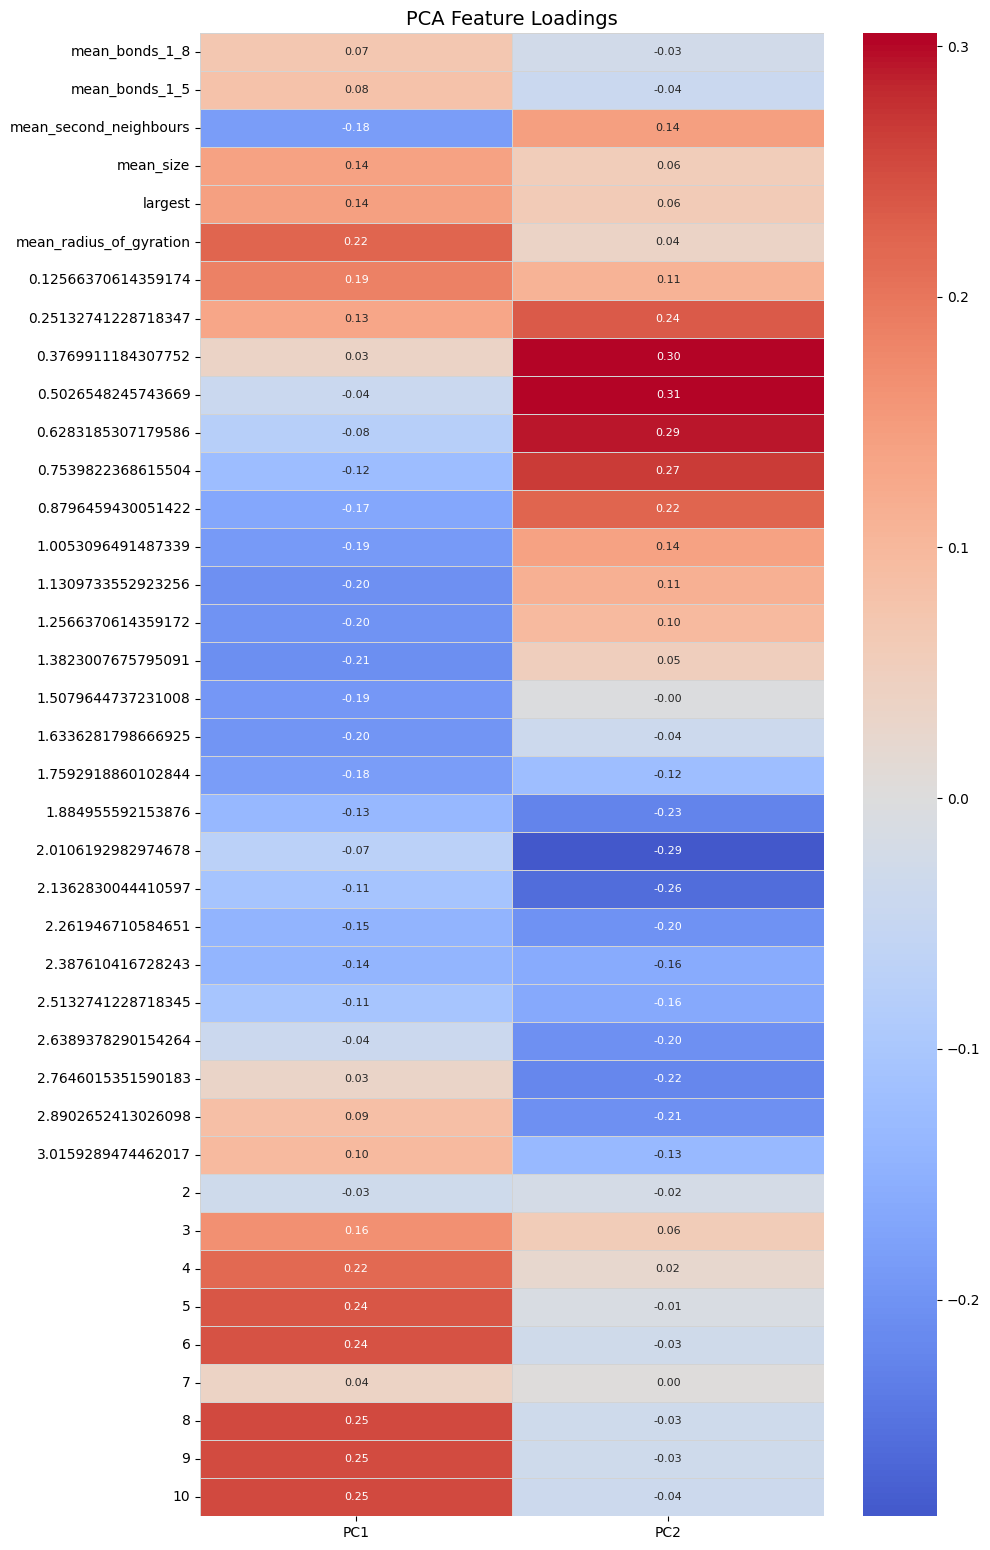

<Figure size 640x480 with 0 Axes>

In [8]:
# Create a DataFrame of loadings
feature_names = df.columns[3:]
print(feature_names, len(feature_names), len(pca.components_.T))

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=feature_names
)

# Display loadings sorted by absolute value in PC1
loadings.sort_values("PC1", key=abs, ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

# Set dynamic figure height based on number of features
n_features = len(loadings)
fig_height = max(6, n_features * 0.4)  # ensures readability for many features

plt.figure(figsize=(10, fig_height))
sns.heatmap(loadings, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            annot_kws={"size": 8}, linewidths=0.5, linecolor='lightgray')

plt.title("PCA Feature Loadings", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()
plt.savefig("loadings_2D.pdf")

In [9]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create DataFrame for Plotly
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3"])
pca_df["Label"] = labels  # your custom label strings
pca_df["Shift"] = df["shift"]
pca_df["Lambda"] = df["lambda"]

# Plot 3D interactive scatter
fig = px.scatter_3d(
    pca_df,
    x="PC1", y="PC2", z="PC3",
    color="Shift",  # or "Shift"
    hover_data=["Shift", "Label"],
    color_continuous_scale="Turbo",  # any sequential scale
    title="3D PCA Colored by Lambda",
    width=900,
    height=750
)

fig.update_traces(marker=dict(size=4))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.write_html("pca_shift.html", auto_open=True)
fig.show()

Index([         'mean_bonds_1_8',          'mean_bonds_1_5',
        'mean_second_neighbours',               'mean_size',
                       'largest', 'mean_radius_of_gyration',
             0.12566370614359174,       0.25132741228718347,
              0.3769911184307752,        0.5026548245743669,
              0.6283185307179586,        0.7539822368615504,
              0.8796459430051422,        1.0053096491487339,
              1.1309733552923256,        1.2566370614359172,
              1.3823007675795091,        1.5079644737231008,
              1.6336281798666925,        1.7592918860102844,
               1.884955592153876,        2.0106192982974678,
              2.1362830044410597,         2.261946710584651,
               2.387610416728243,        2.5132741228718345,
              2.6389378290154264,        2.7646015351590183,
              2.8902652413026098,        3.0159289474462017,
                               2,                         3,
                        

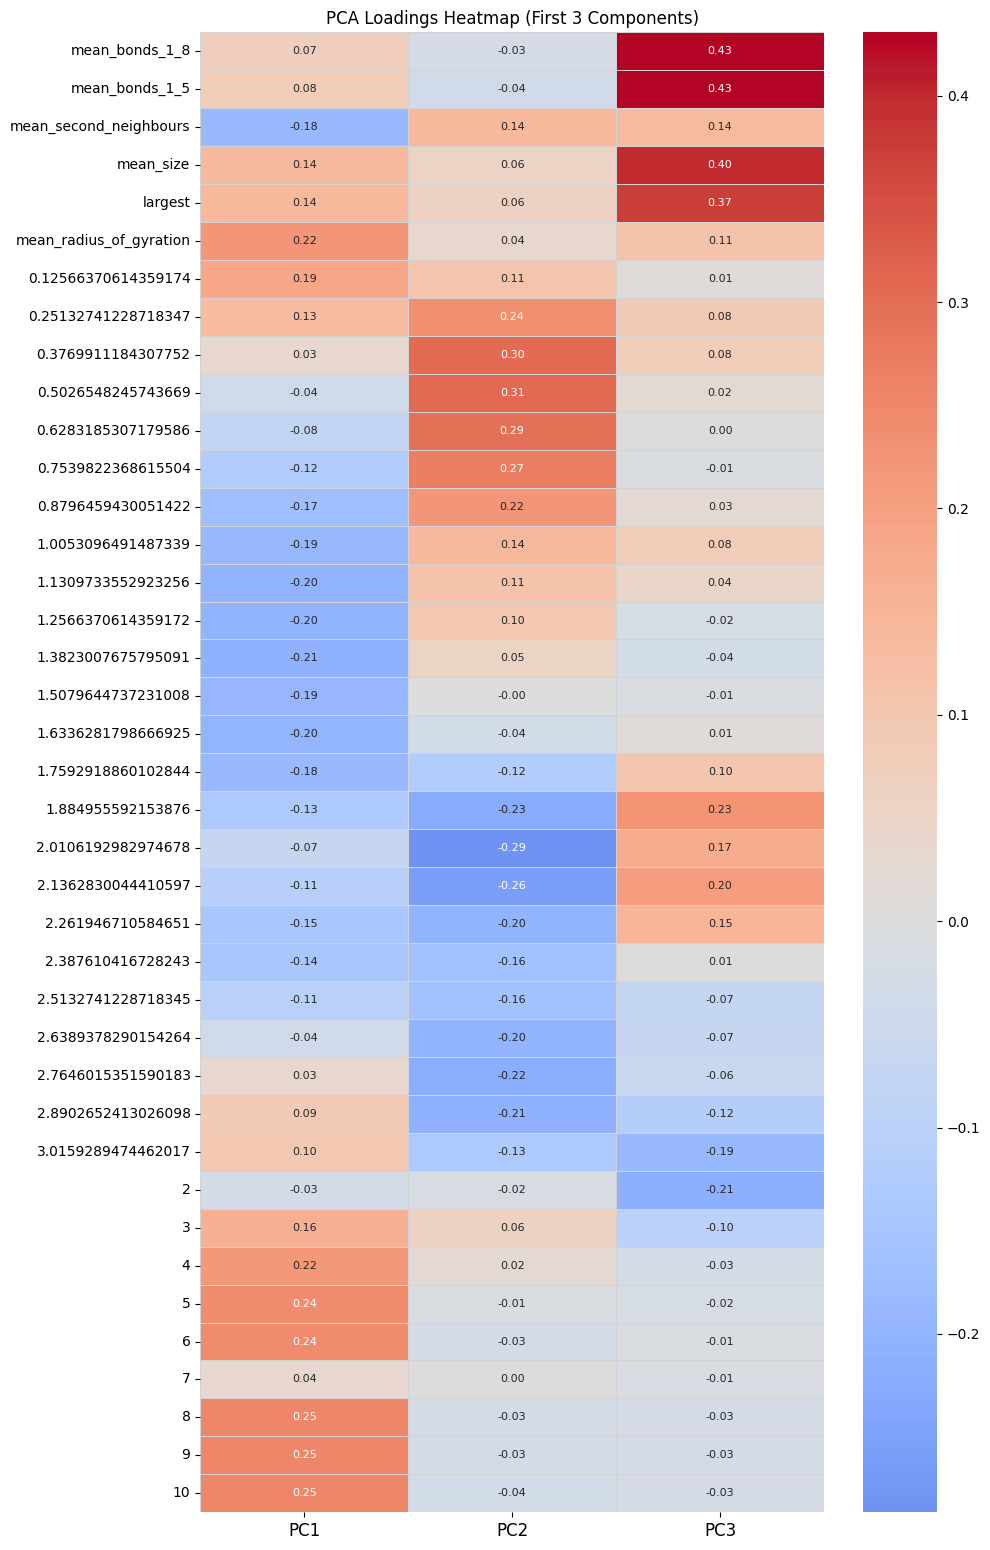

<Figure size 640x480 with 0 Axes>

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

feature_names = df.columns[3:]
print(feature_names, len(feature_names), len(pca.components_.T))

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2", "PC3"],
    index=feature_names
)

# Plot heatmap
plt.figure(figsize=(10, max(6, len(loadings)*0.4)))  # auto-scale height
sns.heatmap(loadings, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            annot_kws={"size": 8}, linewidths=0.5, linecolor='lightgray')

plt.title("PCA Loadings Heatmap (First 3 Components)")
plt.yticks(fontsize=10)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig("loadings_3d.pdf")

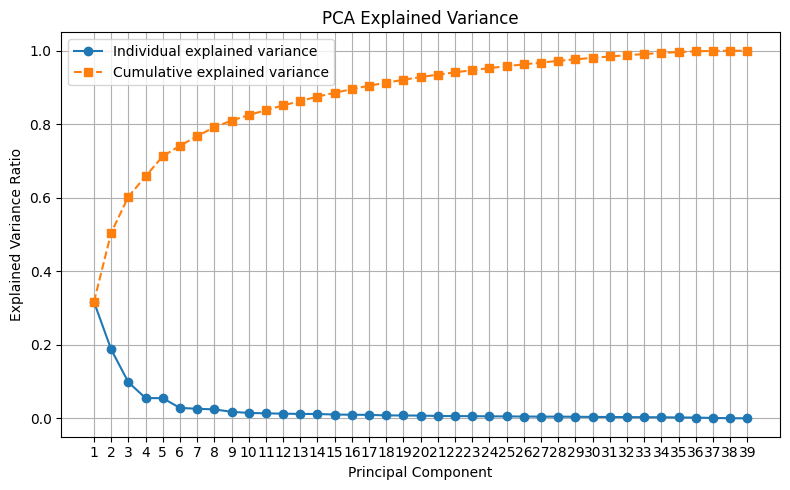

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA().fit(X)

explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
n_components = len(explained_var)

plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components + 1), explained_var, marker='o', label='Individual explained variance')
plt.plot(range(1, n_components + 1), cumulative_var, marker='s', linestyle='--', label='Cumulative explained variance')

plt.xlabel('Principal Component',size=10)
plt.ylabel('Explained Variance Ratio',size=10)
plt.title('PCA Explained Variance')
plt.xticks(range(1, n_components + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("explained_variance_ratio.pdf")

2025-05-10 15:07:01.855714: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-10 15:07:02.053372: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-10 15:07:02.078014: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746882422.156093   27819 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746882422.164729   27819 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746882422.358993   27819 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

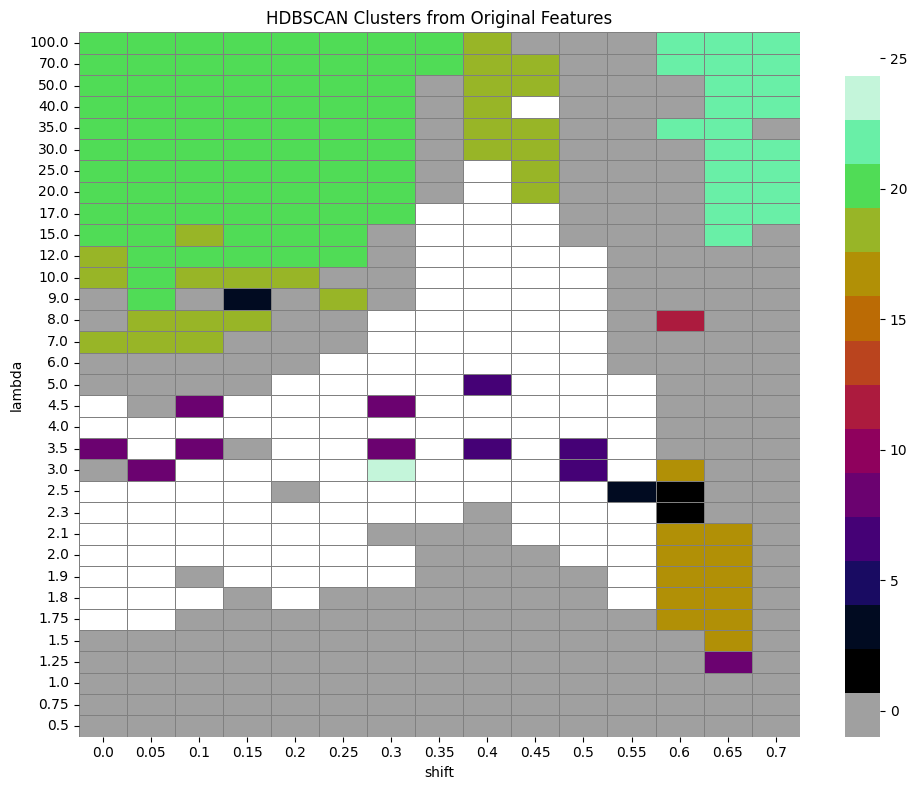

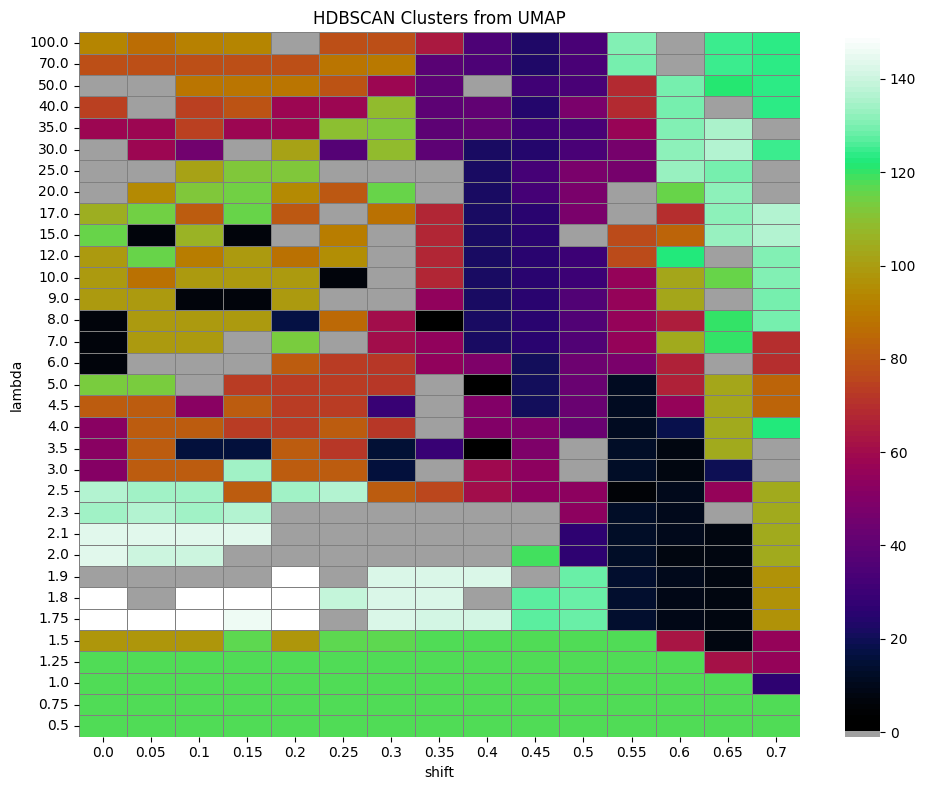

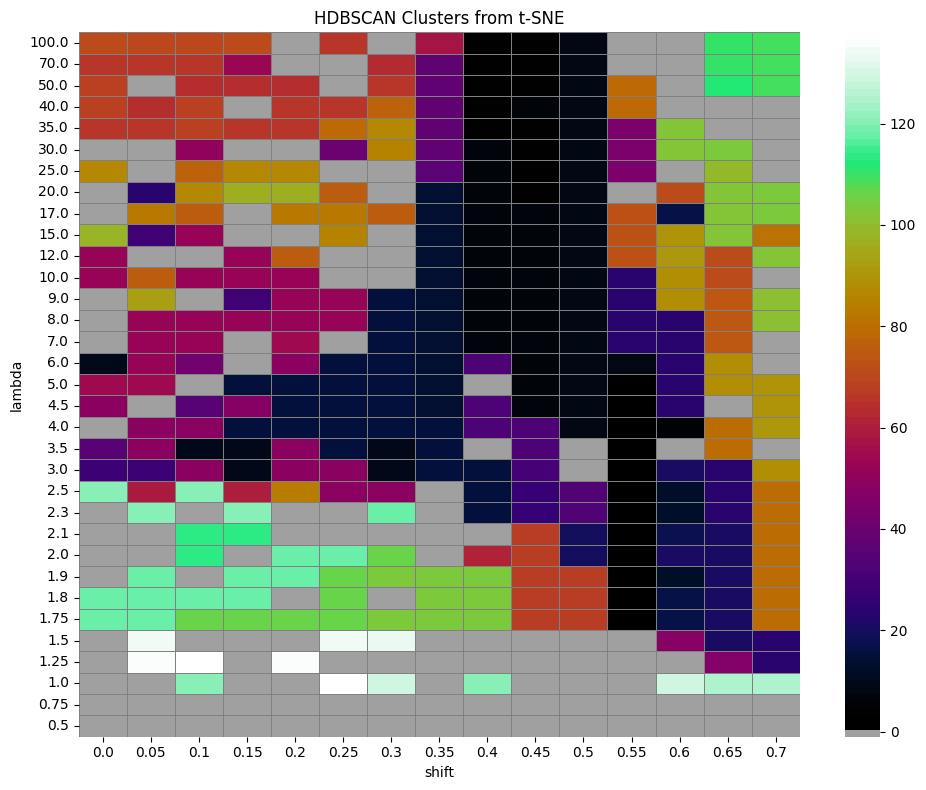

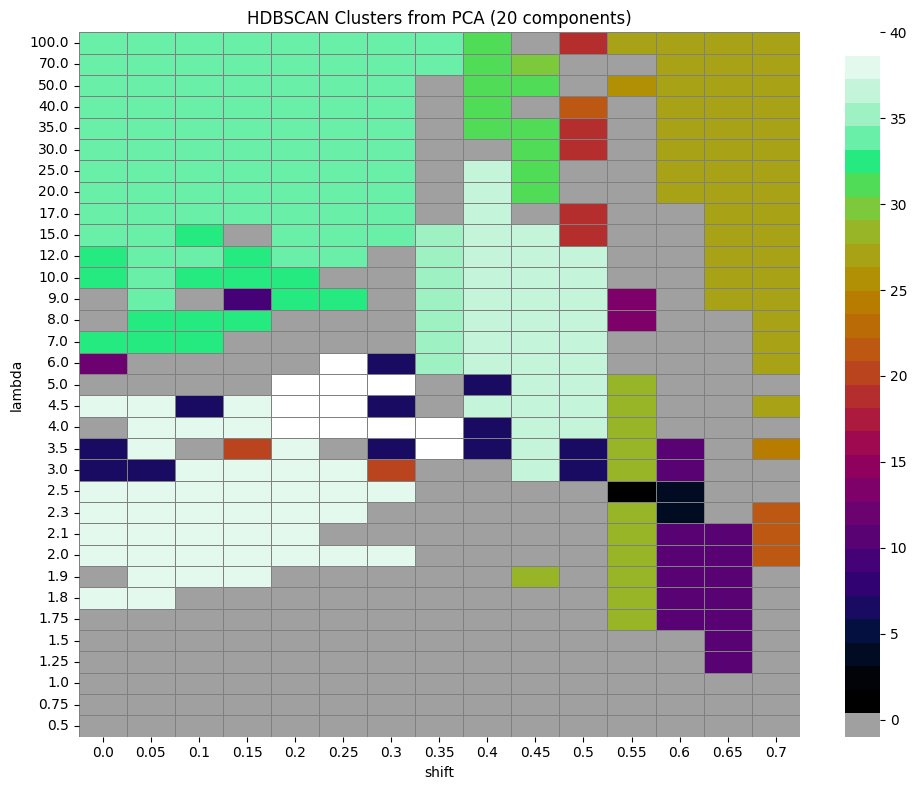

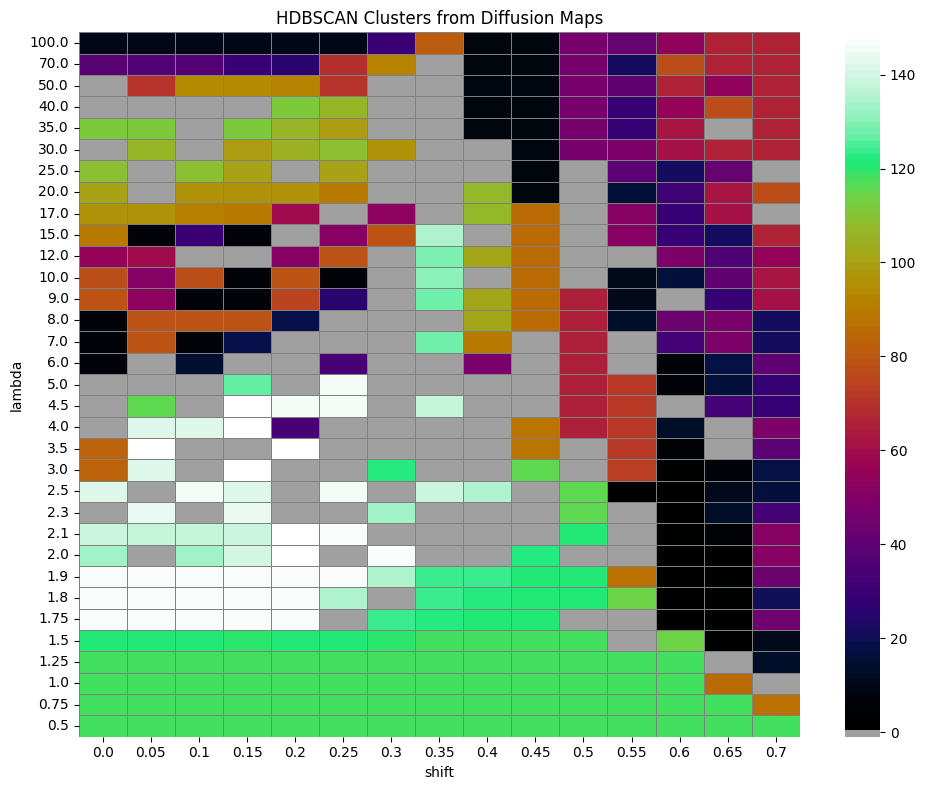

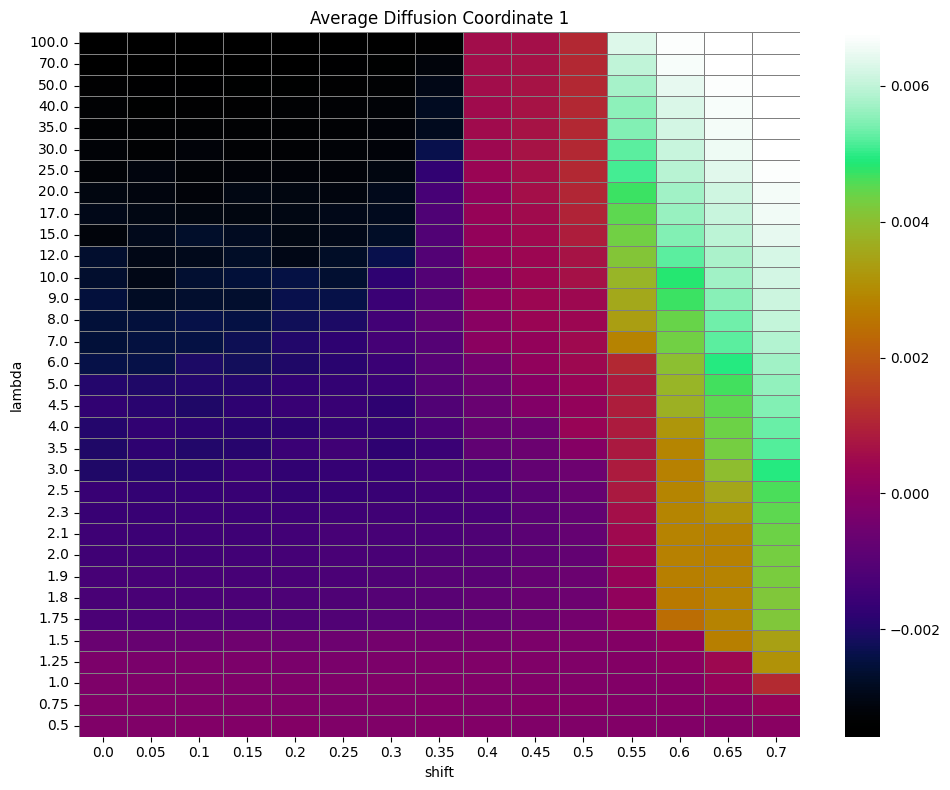

(array([[-7.0552216 ,  5.5196986 ],
        [14.548902  , -0.06840555],
        [13.337573  ,  2.1111822 ],
        ...,
        [-6.02519   ,  6.18106   ],
        [-6.3719616 ,  5.20534   ],
        [10.270752  , 14.57311   ]], dtype=float32),
 array([[-47.972767  , -16.21001   ],
        [  2.9087343 ,  61.699226  ],
        [  2.9221659 ,  39.988724  ],
        ...,
        [-41.83839   , -17.929045  ],
        [-55.395267  , -20.774698  ],
        [ -0.44476205, -37.25737   ]], dtype=float32),
 array([-1, 20, -1, ..., -1, -1, -1]),
       lambda  shift  cluster  cluster_umap  cluster_tsne  cluster_pca  \
 0       70.0   0.55       -1            -1            78           -1   
 1       30.0   0.15       20            45            -1           34   
 2       40.0   0.35       -1            39            37           32   
 3        1.8   0.10       -1           150           117           -1   
 4       25.0   0.50       -1            -1             8           -1   
 ...      ...

In [12]:
import numpy as np
import pandas as pd
import umap
import hdbscan
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from matplotlib.colors import ListedColormap, rgb2hex
import cmasher as cmr
from pydiffmap import diffusion_map as dm
from sklearn.manifold import SpectralEmbedding


def run_umap_tsne_heatmap(X, lambdas, shifts, cluster_min_size=10):
    """
    Perform UMAP, t-SNE, PCA, Diffusion Maps on data X, assign clusters with HDBSCAN,
    and create heatmaps over (shift, lambda) space colored by cluster assignment or diffusion coordinate.
    Plotly figures are saved as HTML, and matplotlib plots as PDF.
    """
    # UMAP embedding (parallelized)
    umap_model = umap.UMAP(n_components=2, random_state=42, n_jobs=-1)
    umap_emb = umap_model.fit_transform(X)

    # t-SNE embedding (parallelized)
    tsne_emb = TSNE(n_components=2, perplexity=30, init='random', random_state=42, n_jobs=-1).fit_transform(X)

    # PCA to 20 components and clustering on them
    pca = PCA(n_components=20)
    pca_emb = pca.fit_transform(X)
    cluster_labels_pca = hdbscan.HDBSCAN(min_cluster_size=cluster_min_size, core_dist_n_jobs=-1).fit_predict(pca_emb)

    # Diffusion Maps
    embedding = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=32)
    diffmap_emb = embedding.fit_transform(X)
    cluster_labels_diffmap = hdbscan.HDBSCAN(min_cluster_size=cluster_min_size, core_dist_n_jobs=-1).fit_predict(diffmap_emb)

    # Cluster in all spaces separately
    cluster_labels = hdbscan.HDBSCAN(min_cluster_size=cluster_min_size, core_dist_n_jobs=-1).fit_predict(X)

    # UMAP clustering via condensed tree + branch detection
    clusterer_umap = hdbscan.HDBSCAN(min_cluster_size=cluster_min_size, core_dist_n_jobs=-1, prediction_data=True)
    clusterer_umap.fit(umap_emb)
    cluster_labels_umap = clusterer_umap.labels_

    # t-SNE clustering via condensed tree + branch detection
    clusterer_tsne = hdbscan.HDBSCAN(min_cluster_size=cluster_min_size, core_dist_n_jobs=-1, prediction_data=True)
    clusterer_tsne.fit(tsne_emb)
    cluster_labels_tsne = clusterer_tsne.labels_

    # Build a DataFrame
    df_cluster = pd.DataFrame({
        'lambda': lambdas,
        'shift': shifts,
        'cluster': cluster_labels,
        'cluster_umap': cluster_labels_umap,
        'cluster_tsne': cluster_labels_tsne,
        'cluster_pca': cluster_labels_pca,
        'cluster_diffmap': cluster_labels_diffmap,
        'UMAP-1': umap_emb[:, 0],
        'UMAP-2': umap_emb[:, 1],
        'tSNE-1': tsne_emb[:, 0],
        'tSNE-2': tsne_emb[:, 1],
        'Diff-1': diffmap_emb[:, 0],
        'Diff-2': diffmap_emb[:, 1],
    })

    # Define distinct colors for all unique clusters, set -1 to gray
    def generate_color_map(clusters):
        unique_clusters = sorted(clusters.unique())
        non_noise = [cl for cl in unique_clusters if cl != -1]
        palette = cmr.chroma(np.linspace(0, 1, len(non_noise)))
        hex_colors = [rgb2hex(c) for c in palette]
        color_map = {str(cl): hex_colors[i] for i, cl in enumerate(non_noise)}
        color_map['-1'] = '#A0A0A0'  # gray for noise
        return color_map

    # Plot Diffusion Map projection
    color_map_diff = generate_color_map(df_cluster['cluster_diffmap'])
    fig_diff = px.scatter(
        df_cluster, x="Diff-1", y="Diff-2", color=df_cluster['cluster_diffmap'].astype(str),
        hover_data={"lambda": True, "shift": True},
        title="Diffusion Map projection with HDBSCAN clusters",
        color_discrete_map=color_map_diff
    )
    fig_diff.write_html("diffmap_clusters.html")
    fig_diff.show()

    # Function to plot a heatmap (discrete labels)
    def plot_cluster_heatmap(df, column, title, filename):
        heatmap_data = df.groupby(['lambda', 'shift'])[column] \
                         .agg(lambda x: x.value_counts().idxmax()) \
                         .unstack().sort_index(ascending=False)

        unique_clusters = sorted(heatmap_data.stack().dropna().unique())
        non_noise = [cl for cl in unique_clusters if cl != -1]
        colors = cmr.chroma(np.linspace(0, 1, len(non_noise)))
        colors_hex = [rgb2hex(c) for c in colors]
        colors_with_gray = ['#A0A0A0' if cl == -1 else colors_hex.pop(0) for cl in unique_clusters]
        cmap = ListedColormap(colors_with_gray)

        plt.figure(figsize=(10, 8))
        sns.heatmap(
            heatmap_data,
            cmap=cmap,
            annot=False,
            cbar=True,
            linewidths=0.5,
            linecolor='gray'
        )
        plt.title(title)
        plt.xlabel("shift")
        plt.ylabel("lambda")
        plt.tight_layout()
        plt.savefig(filename + ".pdf")
        plt.show()

    # Function to plot a heatmap (continuous values)
    def plot_continuous_heatmap(df, value_column, title, filename):
        heatmap_data = df.groupby(['lambda', 'shift'])[value_column].mean().unstack().sort_index(ascending=False)

        plt.figure(figsize=(10, 8))
        sns.heatmap(
            heatmap_data,
            cmap=cmr.chroma,
            annot=False,
            cbar=True,
            linewidths=0.5,
            linecolor='gray'
        )
        plt.title(title)
        plt.xlabel("shift")
        plt.ylabel("lambda")
        plt.tight_layout()
        plt.savefig(filename + ".pdf")
        plt.show()

    # Save heatmaps
    plot_cluster_heatmap(df_cluster, 'cluster', "HDBSCAN Clusters from Original Features", "heatmap_original")
    plot_cluster_heatmap(df_cluster, 'cluster_umap', "HDBSCAN Clusters from UMAP", "heatmap_umap")
    plot_cluster_heatmap(df_cluster, 'cluster_tsne', "HDBSCAN Clusters from t-SNE", "heatmap_tsne")
    plot_cluster_heatmap(df_cluster, 'cluster_pca', "HDBSCAN Clusters from PCA (20 components)", "heatmap_pca")
    plot_cluster_heatmap(df_cluster, 'cluster_diffmap', "HDBSCAN Clusters from Diffusion Maps", "heatmap_diffmap")

    # Continuous Diff-1 heatmap
    plot_continuous_heatmap(df_cluster, 'Diff-1', "Average Diffusion Coordinate 1", "heatmap_diffmap_continuous")

    return umap_emb, tsne_emb, cluster_labels, df_cluster


Shift = df["shift"]
Lambda = df["lambda"]


run_umap_tsne_heatmap(X, Lambda, Shift, cluster_min_size=5)

### Summary Exploration 1

used file: MAG2P_order_parameters-2025-5-5-19:38:49.pickle
date: 8th of May, 2025
data availability: the data can be currently found in: rigid_magnetic/results/ML/Exploration_1

We conducted a first exploration of our feature set with ML algorithms. 
The feature set contains a set of order parameters produced with mag2patch_nbonds.py. Beside mean and std values it also contains the probability distribution of 
mutual magnetic moment distributions. 






In [13]:
df.columns

Index([                'file_id',                  'lambda',
                         'shift',          'mean_bonds_1_8',
                'mean_bonds_1_5',  'mean_second_neighbours',
                     'mean_size',                 'largest',
       'mean_radius_of_gyration',       0.12566370614359174,
             0.25132741228718347,        0.3769911184307752,
              0.5026548245743669,        0.6283185307179586,
              0.7539822368615504,        0.8796459430051422,
              1.0053096491487339,        1.1309733552923256,
              1.2566370614359172,        1.3823007675795091,
              1.5079644737231008,        1.6336281798666925,
              1.7592918860102844,         1.884955592153876,
              2.0106192982974678,        2.1362830044410597,
               2.261946710584651,         2.387610416728243,
              2.5132741228718345,        2.6389378290154264,
              2.7646015351590183,        2.8902652413026098,
              3.01592894

For first explorations of the data set we used **TSNE** and PCA and colored the output according to $\lambda$ and shift. 
The TSNE already show that point similar in $\lambda$ and shift, with a wide band over all shifts that contains un-assembled (liquid) structures and smaller clusters for the high $\lambda$ and high shifts where chains, closepacked and porous structures are expected. 
**UMAP** seems to give a similar clustering as TSNE. 

Equally the **PCA** also shows a lot of structure, although the cluster separation is clear. The points ind 2D and 3D plots present more as meandering single structure where points with similar shifts/$\lambda$ are in a similar position but not clustered togheter. 
Note that it is necessary to scale all variables to have a range between 0 and 1, otherwise the PCA fails to grasp any structure. 
The loadings heatmap shows that for each PC different components contribute and the strongly negative and postive values indicate/underline the graphical observation that the data contains a lot of distinguishing features. The explained variance plots that a surprising amount of feature is necessary to get over 90% explained variance (18). We note that we briefly explored what happens if we only used known maximas from the mutual orientations of the magnetic moments, and in this case only six components are needed to push the variance plot over 90%. We wonder why that is the case. Is it because there is so much more added information or is it because the historgram als adds noise that has to be compensated with more components? 

To test the performace of the dimensionality reductiion through TSNE and UMAP as well as high dimensional clustering we plotted a state diagram across shift and $\lambda$ to see whether these automatic structure detections match up with our expectations fueled by visual inspection of the simulation results. 

From a first glance, the direct high dimensional clustering (HDBSCAN) seems to fare best in caputuring some of the regions: chains (red), liquid (blue), the different networked structure (orange, yellow, and lilac), the kagome (light lilac). However, it seems to fail to detect the porous disordered structures between s=0.45 and s=0.55. It might have to do with the fact that these structures, due to their porosity and disorder, have a RDF that has no first minimum, instead there is a plateau that signifies that there a lot of possibilites for first to second neighbur alignment. In contrast the other porous clusters - the Kagome like structures have a sharp minimum at around 1.5. (see accompanying plot below). 

The state diagram derived by the clustering of the 2D UMAP, seems to somewhat the liquid line for all shifts, but seems rather disorganized for everything else. There are too many clusters than seems reasonable from visual inspection. 

The state diagram derived by TSNE seems to see stiff chains, the kaogme and some networked strucuters, but fails to distinguish liquid from rings/chains for small shifts. 



/tmp/ipykernel_27819/547100535.py:2: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead

/tmp/ipykernel_27819/547100535.py:3: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



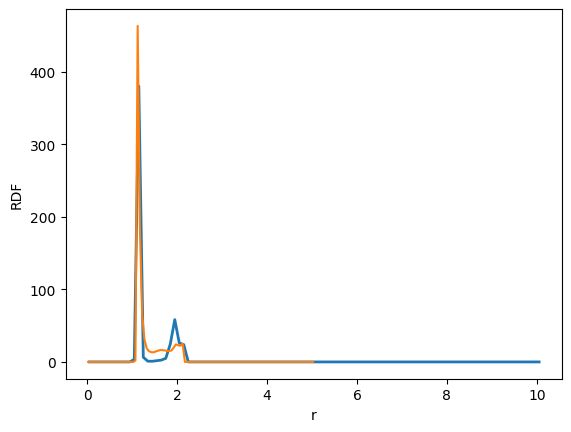

<Figure size 640x480 with 0 Axes>

In [14]:
# Kagome 
data_kagome = pd.read_csv("/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/gofr_s0.6_l_2.3.dat", delim_whitespace=True, header=None ).values
data_porous_disord = pd.read_csv("/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/gofr_s0.5_l_2.3.dat", delim_whitespace=True, header=None ).values

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

plt.plot(data_kagome[:,0], data_kagome[:,1], lw=2, label="Kagome")
plt.plot(data_porous_disord[:,0], data_porous_disord[:,1], label="Porous disordered")
plt.xlabel("r")
plt.ylabel("RDF")
plt.show()
plt.savefig("GR_Kagome_Disordered_Porous.pdf")

### Next steps 

There is a couple of avenues to explore when going forward: 

#### Changing the cutoff 
First off, inspecting the RDF again for some structures, made me reconsider the cutoff range: For this exploration it was 1.3, but it actually seems to be closer to 1.5 for the Kagome structures and for the porous disordered structures at s=0.5, there is not even a second minimum, making the choice of the cutoff difficult, as it is usally chosen to be the first minimum of the RDF. A first step will be at least to extend it to 1.5. It is a good  thing, that I already have a quantity called second_neighbours, that captures everything between 1.3 and 2.0 -- unsurprisingly this parameter lights up for the region between s= 0.45 and 0.55 where we expect the porous disordered structures. 

#### Using all data points and not averages per state point 
It might be interesting to try this, as for the methods given, averaging is strictly speaking not necessary. It the last step, when generating the state diagram, I will have to bin the results, to get meaningful state point values. 

#### Using known and apriori unknown maxima in the mutual moment orientations 
I have already prepared a routine that allows to find all maxima and then evaluates the histograms for all data points for these maxima positions. This is a way to 
agnostically handle moment orientations: we do not presume we know the maxima beforehand. 
I have however also used the known maxima: 0,60,90,120 and 180 degrees. While it limits the information, it may reduce the noise due to high dimensionality. 

#### Using the full radius of gyration function
Similarly as with the orientation histograms I intend to use the full radius of gyration function, that is dependent on the cluster size. 

#### Using autoencoders and compare them with the PCA results 
Autoencoder latent spaces are thought to be equivalent to PCA biplots. We have the opportunity to inspect that. 

#### Test the robustness of clusteirng methods for state diagram. 
To understand if clustering of original data/reduced data is relyable accross different clustering hyper parameters, we have to explore these parameter spaces. 

#### Testing the performance of fancier tools 
Find out if there is more up-to-date clustering/unsupervised learning methods and try them out on the data set 

### Testing with raw positions 
Similarily as with the autoencoder project: can we learn on raw positions? 

In [15]:
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Feature matrix and labels
feature_names = df.columns[3:]
y = labels  # already defined
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

#Define the model
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Accuracy scores
scores = cross_val_score(clf, X, y_encoded, cv=cv)
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy: {:.3f}".format(np.mean(scores)))

# Cross-validated predictions
y_pred = cross_val_predict(clf, X, y_encoded, cv=cv)

# Classification report
print(classification_report(y_encoded, y_pred, target_names=class_names))

# Confusion matrix plot
ConfusionMatrixDisplay.from_predictions(y_encoded, y_pred, display_labels=class_names)
plt.title("Confusion Matrix (Cross-Validated Predictions)")
plt.show()

# Fit on full data (only for visualization)
clf_visual = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_visual.fit(X, y_encoded)

plt.figure(figsize=(16, 10))
plot_tree(clf_visual, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Decision Tree (Visualization Only)")
plt.tight_layout()
plt.show()
'''

'\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom sklearn.tree import DecisionTreeClassifier, plot_tree\nfrom sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold\nfrom sklearn.metrics import classification_report, ConfusionMatrixDisplay\nfrom sklearn.preprocessing import LabelEncoder\n\n# Feature matrix and labels\nfeature_names = df.columns[3:]\ny = labels  # already defined\nle = LabelEncoder()\ny_encoded = le.fit_transform(y)\nclass_names = le.classes_\n\n#Define the model\nclf = DecisionTreeClassifier(max_depth=4, random_state=42)\n\n# Cross-validation setup\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\n\n# Accuracy scores\nscores = cross_val_score(clf, X, y_encoded, cv=cv)\nprint("Cross-validation accuracy scores:", scores)\nprint("Mean accuracy: {:.3f}".format(np.mean(scores)))\n\n# Cross-validated predictions\ny_pred = cross_val_predict(clf, X, y_encoded, cv=cv)\n\n# Classification report\nprint(c